# Bioinfo Projekt Gruppe 4-4: k-means 
*Members: Benedict, Julia, Thorge and Marilena*

Just as compact as possible

## PBMC Dataset

In [3]:
import WWDKClustering as cl
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.manifold import TSNE
import umap

In [4]:
daten = cl.DataLoader("http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz")

In [5]:
df_pbmc = daten.to_df()

#### PCA

In [6]:
pca = PCA()
pca_pbmc = pca.fit_transform(df_pbmc)


#### t-sne

In [7]:
tsne = TSNE()
pbmc_tsne =tsne.fit_transform(pca_pbmc)

#### UMAP

In [8]:
umap = umap.UMAP()
pbmc_umap =umap.fit_transform(pca_pbmc)

### Testing kmeans

In [9]:
pbmc_tsne_clust = cl.Kmeans(pbmc_tsne)
pbmc_umap_clust = cl.Kmeans(pbmc_umap)

In [10]:
pbmc_tsne_clust.kmeans()
pbmc_umap_clust.kmeans()

array([[  4.741714 ,   2.615533 ],
       [  6.925427 ,   1.4871658],
       [  5.323314 ,   0.9746646],
       [  4.4357443,   5.223218 ],
       [  2.7676158,   3.403329 ],
       [  6.63049  ,   5.145929 ],
       [  6.3855896,  -0.4454194],
       [-14.171279 ,   2.1665864]], dtype=float32)

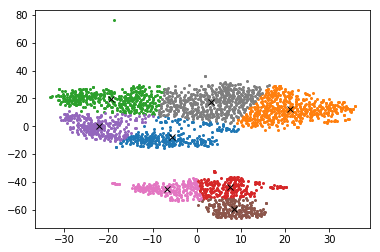

In [11]:
pbmc_tsne_clust.plot()

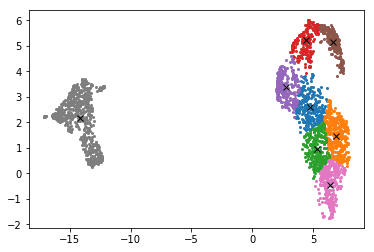

In [12]:
pbmc_umap_clust.plot()

In [13]:
test3 = cl.Kmeans(pca_pbmc)

In [14]:
test3.kmeans()

KeyboardInterrupt: 

In [ ]:
test3.plot()